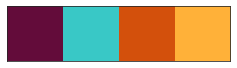

In [165]:
from typing import NamedTuple
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [166]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [167]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [168]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [169]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

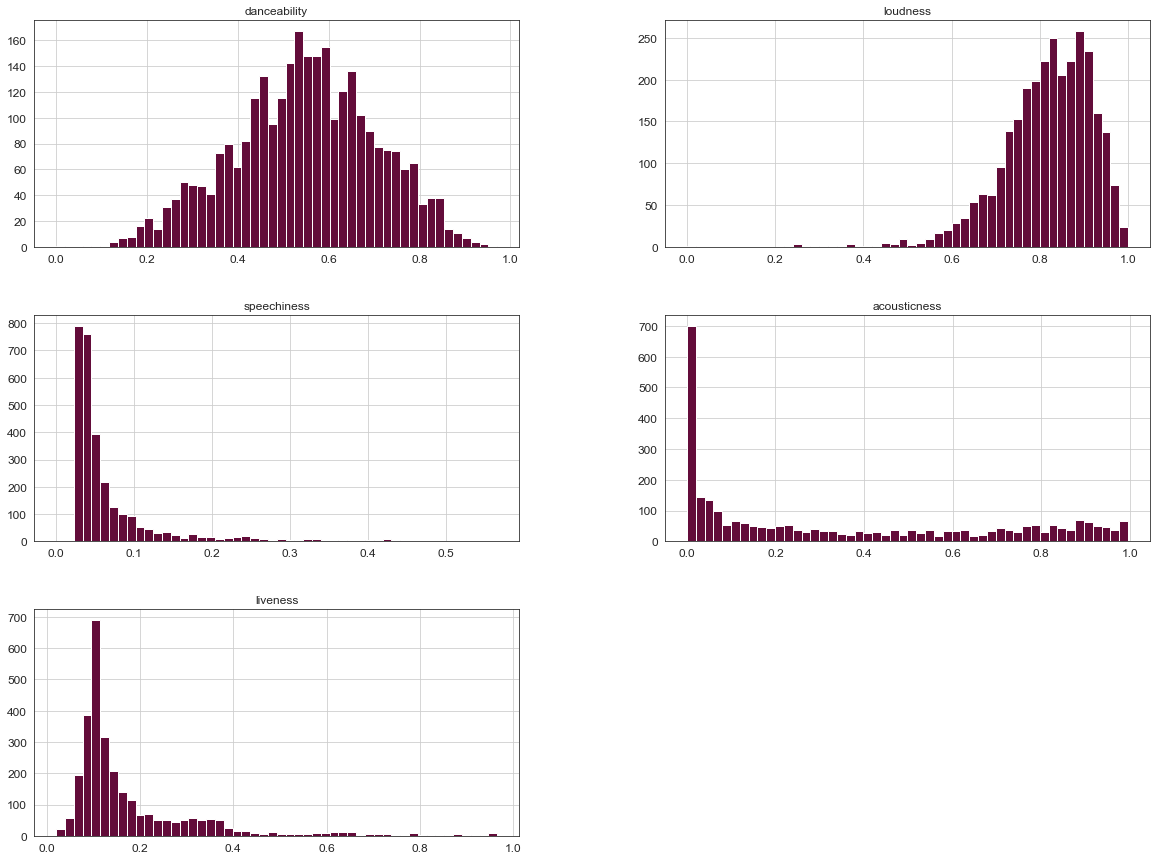

In [170]:
songs.hist(bins=50,figsize=(20,15))

In [171]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [172]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [173]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3439986619104982)
For n_clusters = 4, silhouette score is 0.31688058716236545)
For n_clusters = 5, silhouette score is 0.2770879855441354)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.2603306329989804)
For n_clusters = 8, silhouette score is 0.25175289533506073)
For n_clusters = 9, silhouette score is 0.25620763121364454)
For n_clusters = 10, silhouette score is 0.2499811843866407)
For n_clusters = 11, silhouette score is 0.24168017842819903)
For n_clusters = 12, silhouette score is 0.2381622503735916)
For n_clusters = 13, silhouette score is 0.24067533837214564)
For n_clusters = 14, silhouette score is 0.2259415593264176)


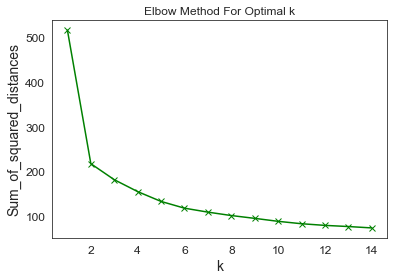

In [174]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [176]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

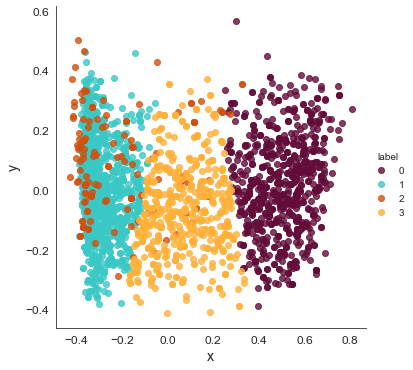

In [177]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [178]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

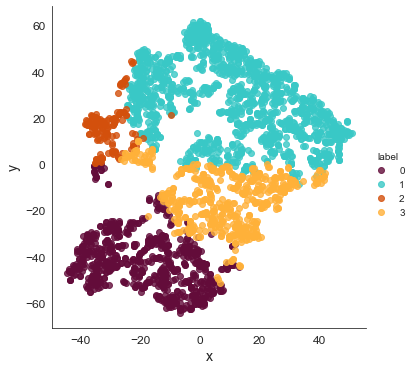

In [179]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [180]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [181]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [182]:
songs['label'] = y_kmeans

In [183]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    1362
0     786
3     594
2     147
Name: label, dtype: int64

In [184]:
songs[songs['label'] == 0].tail(50) #Happy

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
566,O Mundo É Um Moinho,Cartola,1xCbDvw3UNReOWq9BbAThc,0.485,0.655976,0.0578,0.939,0.1100,0
1408,Cannonball,Damien Rice,0knqVSsgD7C8yu5yNmQFbA,0.642,0.636175,0.0326,0.845,0.1130,0
1335,Nada que esperar,Salvador Sobral,7rgxfLs9F79gKJaROwHdVl,0.634,0.649482,0.0544,0.728,0.1010,0
1380,Portrait 19,The Paper Kites,7rSqfTFXbHrjbGZNEO0XFW,0.521,0.597184,0.0339,0.972,0.1270,0
1969,Comptine d'un autre été: la démarche,Yann Tiersen,58e9wqAPOuYBp9fMTdhEI8,0.259,0.646874,0.0474,0.995,0.1360,0
1357,Good Dancers,Emmy Curl,2sNeOmgHQYwDjUAe2Og3GR,0.537,0.574934,0.0385,0.741,0.2070,0
680,Be Yourself,Frank Ocean,1IdZvb2XK8NmsovQlV6CPn,0.657,0.747159,0.5410,0.985,0.1490,0
1372,Bloom - Bonus Track,The Paper Kites,41yIvlFgvGwxq8qTqAR7eG,0.592,0.783169,0.0246,0.882,0.1120,0
2099,"Kings Row; Main Title (From ""Kings Row"")",Erich Wolfgang Korngold,2SrnOY9yaLCOlqhER4OkTa,0.355,0.811673,0.0326,0.840,0.3250,0
1509,Casa na Praia,Primeira Dama,3T9BxdOjmxTl1f5GktqRun,0.295,0.774439,0.0437,0.780,0.1090,0


In [185]:
songs[songs['label'] == 1].head(50) #Energetic

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2277,Daddy Issues,The Neighbourhood,5E30LdtzQTGqRvNd7l6kG5,0.588,0.792032,0.0329,0.067800,0.1230,1
987,Climbing Up the Walls,Radiohead,0R332cdlS9LyE0Ge2PSlVC,0.172,0.844862,0.0420,0.097100,0.1950,1
2385,November Has Come,Gorillaz,6lrDckuosGpwEHtm1hHBcf,0.702,0.815985,0.2390,0.081500,0.0864,1
1085,Under Cover of Darkness,The Strokes,3sqW6O1PtfBnmJpHRitB5N,0.340,0.953610,0.0540,0.004160,0.0625,1
915,I Miss You,Björk,5L18d6jJ94EYTu1FG1peY0,0.636,0.760174,0.0385,0.023700,0.0201,1
1521,Chamem A Pulíssia,Trabalhadores Do Comércio,7BBQtUooBmBFMtpueLOuUN,0.599,0.888750,0.0324,0.109000,0.1460,1
2006,Ode To My Family,The Cranberries,1eQuRtkMEPhf2DGzpBVTE6,0.367,0.774758,0.0235,0.047200,0.3440,1
1476,Cool,Dua Lipa,4GE0As8SVSjCMVYkRaaWwJ,0.469,0.936976,0.0664,0.133000,0.0931,1
1232,Needed Me,Rihanna,1Tt4sE4pXi57mTD1GCzsqm,0.671,0.828494,0.2440,0.110000,0.0825,1
929,Is She Weird,Pixies,3Ao3tTpiXLSmch1kTJZ7Fx,0.688,0.702233,0.0367,0.033600,0.1440,1


In [186]:
songs[songs['label'] == 2].tail(50) #Calm

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
633,Believe That,THE ANXIETY,3jk0Bu14ZXXdd5z6PhpIiw,0.458,0.889655,0.0518,0.009210,0.505,2
2814,Numb,Linkin Park,1y1sChqjzdNWzwdHQADMrR,0.496,0.933303,0.0381,0.004600,0.639,2
1759,PrettyGirlz,WILLOW,3NYq7c5AIUiubPz9UZl82h,0.385,0.804168,0.0525,0.033100,0.636,2
2004,Give It to Me,HOMESHAKE,2UsREIjT72ZEZnhdvpyg7R,0.529,0.847337,0.0690,0.180000,0.493,2
2765,Time of Dying,Three Days Grace,6gPd6brcBXlbGdy1obe234,0.306,0.946211,0.0567,0.001050,0.520,2
2547,Love The Way You Lie,Eminem,15JINEqzVMv3SvJTAXAKED,0.749,0.909855,0.2270,0.241000,0.520,2
2490,Momentz (feat. De La Soul),Gorillaz,2RCp9QBnFSxdKe8RD4xF8s,0.781,0.908711,0.2850,0.054900,0.597,2
795,Black Qualls,Thundercat,7qaQK6Eatz1KQFs1VZx2YR,0.618,0.845368,0.0359,0.535000,0.577,2
2652,House On Fire,Rise Against,4c75xeSteTcgSSxRtsKqOJ,0.427,0.985628,0.0886,0.001550,0.459,2
2805,Don't Stay,Linkin Park,2yss0n7KmvmSr4EHvjfFpn,0.488,0.961435,0.1080,0.001530,0.911,2


In [187]:
songs[songs['label'] == 3].tail(50) #Sad

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1740,Good Day,Bombay Bicycle Club,2dHTK5Bc61ddJ07vhpNnfn,0.816,0.736247,0.0574,0.198,0.0948,3
1815,idfc,blackbear,6y6jbcPG4Yn3Du4moXaenr,0.630,0.810822,0.0611,0.611,0.1140,3
2032,I Remember,Damien Rice,6C6H2lkwmb2F2eUHhnlNy5,0.321,0.739228,0.0387,0.288,0.1140,3
382,Butterfly,UMI,4qkVALwOxCIEZ7I5gkZ3m4,0.785,0.659064,0.0892,0.255,0.0953,3
2660,I Saw Her Standing There - Remastered 2009,The Beatles,3KiexfmhxHvG5IgAElmTkd,0.491,0.782078,0.0361,0.270,0.0665,3
383,Bet Reimagined,UMI,6M39btOfPdlgzWlz46B9Cw,0.568,0.840923,0.0546,0.432,0.1210,3
217,Pink Moon,Tash Sultana,1FGrw8CHZlMcMWzck3oCng,0.280,0.794853,0.0308,0.539,0.1800,3
1668,Woodland,The Paper Kites,431qZaQAJuIolwBrlDa6Yg,0.435,0.790940,0.0410,0.535,0.1620,3
1293,Soluços,Jards Macalé,6cXEOMbwkXicYqLj2vygWW,0.400,0.823171,0.0538,0.472,0.3330,3
516,Já Não És Ninguém,Bejaflor,3ZbPfzH3LaXPhjesmUMENq,0.544,0.774758,0.0369,0.319,0.1050,3


In [188]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)
cross_val_score(rfc,X,y,cv=5)

array([0.98961938, 0.98269896, 0.98961938, 0.98269896, 0.98786828])

In [189]:
y_pred = rfc.predict(X_test)

In [190]:
X_train

,danceability,loudness,speechiness,acousticness,liveness
714,0.351,0.799484,0.0497,0.000368,0.1860
994,0.610,0.832832,0.0277,0.780000,0.2900
2232,0.440,0.811460,0.0342,0.692000,0.2440
1357,0.537,0.574934,0.0385,0.741000,0.2070
1865,0.580,0.816996,0.0332,0.079200,0.1610
...,...,...,...,...,...
441,0.539,0.864317,0.0490,0.145000,0.0879
2002,0.592,0.783169,0.0246,0.882000,0.1120
2069,0.441,0.651239,0.0641,0.883000,0.1310
958,0.668,0.812046,0.0358,0.517000,0.1390


In [191]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[272   0   1   5]
 [  0 434   0   0]
 [  0   4  54   1]
 [  2   1   2 178]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

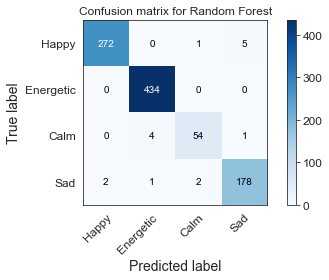

In [192]:
#definitions=['Energetic','Depressed','Sad','Calm','Happy','Contentment','Frantic','Exuberant']
definitions=["Happy",'Energetic','Calm','Sad']
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [193]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [194]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling


In [195]:
songs[songs["artist"]=="Billie Eilish"]

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2339,my boy,Billie Eilish,1RGasjWLZ4qMN7wbtkLa3u,0.692,0.811088,0.2070,0.47200,0.1170,3
2412,Therefore I Am,Billie Eilish,54bFM56PmE4YLRnqpW6Tha,0.889,0.836957,0.0697,0.21800,0.0550,3
2050,lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,0.351,0.774785,0.0333,0.93400,0.0950,0
2331,wish you were gay,Billie Eilish,3Fj47GNK2kUF0uaEDgXLaD,0.853,0.772416,0.2410,0.39000,0.7520,2
2346,MyBoi - TroyBoi Remix,Billie Eilish,1T3E8z6VMXSsACrBSQHTkN,0.879,0.916163,0.0883,0.00626,0.0653,1
2330,you should see me in a crown,Billie Eilish,3XF5xLJHOQQRbWya6hBp7d,0.678,0.764778,0.1860,0.46200,0.1390,3
494,bitches broken hearts,Billie Eilish,5t3Vk8bRKylx4fjj7qlbib,0.778,0.774652,0.0482,0.92100,0.0958,0
2332,when the party's over,Billie Eilish,43zdsphuZLzwA9k4DJhU0I,0.367,0.668991,0.0972,0.97800,0.0897,0
2326,bad guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,0.701,0.752003,0.3750,0.32800,0.1000,3
2336,ilomilo,Billie Eilish,7qEKqBCD2vE5vIBsrUitpD,0.855,0.643441,0.0585,0.72400,0.0896,0
